<a href="https://colab.research.google.com/github/eakubrakova/MFTI_2023/blob/main/lecture_07_code_labs_02_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Цель занятия
На этом занятии мы рассмотрим применение алгоритма DBSCAN для задачи кластеризации.

Процесс обучения алгоритма DBSCAN состоит из следующих шагов:
1. Задание параметров: Прежде чем приступить к обучению DBSCAN, необходимо задать параметры алгоритма. Главными параметрами являются:
    eps (epsilon): радиус окрестности, в пределах которой точки считаются соседними.
    min_samples: минимальное количество точек в окрестности, необходимое для определения основной точки.
    Значения этих параметров должны быть выбраны в соответствии с характеристиками данных и требуемым уровнем плотности точек.
2. Вычисление плотности: Алгоритм DBSCAN анализирует плотность точек в пространстве данных. Для каждой точки вычисляется число соседей, находящихся в пределах заданного радиуса eps.
3. Определение типов точек: В зависимости от числа соседей каждая точка может быть классифицирована как:
    Основная точка (core point): точка, для которой число соседей в окрестности eps превышает или равно min_samples.
    Граничная точка (border point): точка, для которой число соседей в окрестности eps меньше min_samples, но находится в окрестности основной точки.
    Шумовая точка (noise point): точка, для которой число соседей в окрестности eps меньше min_samples и не находится в окрестности основной точки.
4. Формирование кластеров: DBSCAN идентифицирует связанные основные точки и объединяет их в кластеры. Две точки считаются связанными, если есть путь от одной точки к другой через серию соседних точек, и каждая точка на этом пути также является основной. В результате формируются кластеры различной формы и размеров.
5. Маркировка граничных точек: Граничные точки, которые не принадлежат ни одному кластеру, могут быть отмечены соответствующим образом или оставаться без метки.

Важно отметить, что DBSCAN не требует явного обучения или итераций, как в случае с алгоритмами, основанными на центроидах, например, K-средних. Он основывается на анализе плотности точек и обнаружении связанных областей в данных. Поэтому процесс работы DBSCAN не включает фазы обучения и тестирования, а только параметризацию и применение алгоритма к данным.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
# Генерируем случайные данные
np.random.seed(0)
X = np.random.randn(100, 2)

In [3]:
# Задаем параметры DBSCAN
epsilon = 0.3  # Радиус окрестности
min_samples = 5  # Минимальное количество соседей

In [4]:
# Применяем алгоритм DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(X)

# Получаем метки кластеров
labels = dbscan.labels_

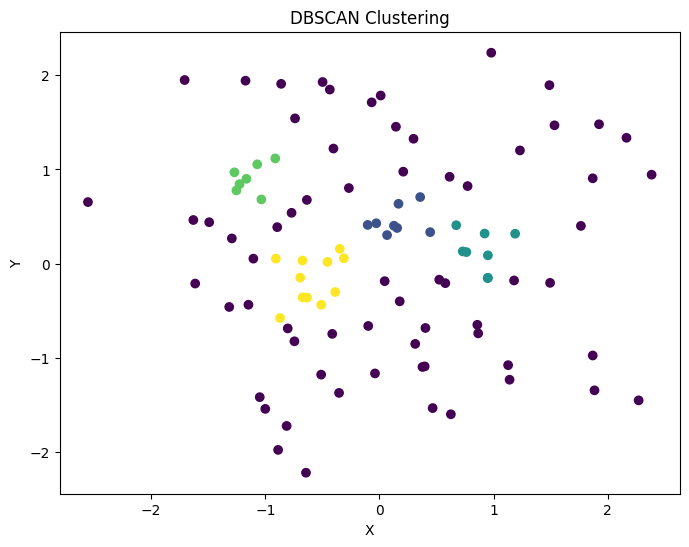

In [5]:
# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [6]:
# Получаем количество кластеров
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Количество кластеров:", num_clusters)

Количество кластеров: 4
